In [1]:
from spatial_filtering import arrays, constants, simulation
import numpy as np
import matplotlib.pyplot as plt

import importlib

importlib.reload(arrays)
importlib.reload(constants)
importlib.reload(simulation)

num_antenna = 21
num_samples = 1000
f = 1e9
wv = constants.c / f
d  = wv/2

theta_signal_deg = [40, 41, 42, 43]

array = arrays.UniformLinearArray(num_antenna, d)
t = np.linspace(0, 10, num_samples)

data = simulation.simulate_linear_array(array, f, theta_signal_deg, 10, t, sigma=0)


In [61]:
data

array([[-12.9949118  +3.32248436j, -13.17804703 +2.49914217j,
        -13.3090704  +1.66591725j, ..., -12.4753942  +4.92657839j,
        -12.76039057 +4.13268285j, -12.99492227 +3.32244342j],
       [ 31.2664296 +13.25568864j,  30.37144533+15.19467702j,
         29.35635885+17.07357889j, ...,  32.68244546 +9.22825337j,
         32.03776798+11.26429422j,  31.26638784+13.25578715j],
       [  3.42684593+12.41397362j,   2.63981127+12.60481696j,
          1.84233761+12.74581525j, ...,   4.95723065+11.88595299j,
          4.20032444+12.1740416j ,   3.42680682+12.41398442j],
       ...,
       [  3.42684593-12.41397362j,   4.20032933-12.17403991j,
          4.95720275-11.88596463j, ...,   1.84230768-12.74581957j,
          2.63981632-12.6048159j ,   3.42688504-12.41396283j],
       [ 31.2664296 -13.25568864j,  32.0377725 -11.26428136j,
         32.68242379 -9.2283301j , ...,  29.35631877-17.07364782j,
         30.37145143-15.19466483j,  31.26647137-13.25559013j],
       [-12.9949118  -3.3224

In [2]:
from tqdm import tqdm
acm = data @ data.conj().T / (num_samples - 1)
evals, evecs = np.linalg.eigh(acm)

theta_range = np.linspace(39, 44, 500000)
assert len(evals) == num_antenna
num_interferers = 4

noise_matrix = evecs[:, :-num_interferers] @ evecs[:, :-num_interferers].conj().T


output = []
for theta in tqdm(theta_range):
    steer_vec = array.steering_vector(np.deg2rad(theta), wv).T

    Q = 1/np.abs(steer_vec.conj().T @ noise_matrix  @ steer_vec) 
    output.append(Q)
output = np.array(output)
output = 10 * np.log10(np.abs(output) / np.max(np.abs(output))) # convert to dB

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500000/500000 [00:46<00:00, 10782.77it/s]


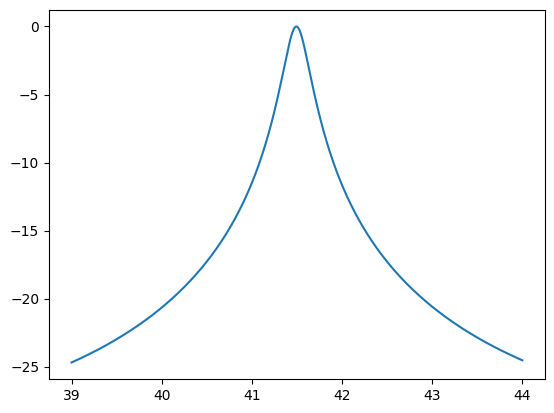

In [3]:
plt.plot(theta_range, output)

In [51]:
output.max()

np.float64(0.0)